In [80]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

##### ### Key Name	Description
1. 
Loan_ID	Unique Lo
a    n ID2. 
Gender	Male/ F    
    emal3. e
Married	Applicant married    
     (Y/4. N)
Dependents	Number of dep    
    ende5. nts
Education	Applicant Education (Graduate/ Under G    
    radu6. ate)
Self_Employed	Self-emplo    
    yed 7. (Y/N)
ApplicantIncome	Applic    
    ant 8. income
CoapplicantIncome	Coappli    
    cant9.  income
LoanAmount	Loan amount     
    in t10. housands
Loan_Amount_Term	Term of a l    
    oan 11. in months
Credit_History	credit history me    
    ets 12. guidelines
Property_Area	Urban/ Se    
    mi-U13. rban/ Rural
Loan_Status	Loan approved (Y/N)


In [83]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,LP001002,0,Graduate,0.0,5849,NaN,1.0,1
1,LP001003,1,Graduate,0.0,4583,128.0,1.0,0
2,LP001005,0,Graduate,NaN,3000,66.0,1.0,1
3,LP001006,0,Not Graduate,0.0,2583,120.0,1.0,1
4,LP001008,0,Graduate,0.0,6000,141.0,1.0,1


Remove loan id column (irrelevant)

In [84]:
df.drop(["Loan_ID"], axis="columns", inplace=True)
df.dropna(inplace=True)

In [85]:
df

,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,Graduate,0.0,4583,128.0,1.0,0
3,0,Not Graduate,0.0,2583,120.0,1.0,1
4,0,Graduate,0.0,6000,141.0,1.0,1
6,0,Not Graduate,0.0,2333,95.0,1.0,1
7,3+,Graduate,0.0,3036,158.0,0.0,0
...,...,...,...,...,...,...,...
608,0,Graduate,0.0,3232,108.0,1.0,1
609,0,Graduate,0.0,2900,71.0,1.0,1
610,3+,Graduate,0.0,4106,40.0,1.0,1
611,1,Graduate,0.0,8072,253.0,1.0,1


edit and convert number on string data to numeric

convert y/n and male/female data to 1/0

In [86]:
#df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})
#df['Property_Area'] = pd.factorize(df['Property_Area'])[0] + 1
df['Dependents'] = pd.factorize(df['Dependents'])[0] + 1
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df["Credit_History"] = pd.to_numeric(df['Credit_History'], errors='coerce').astype(int)
df["LoanAmount"] = pd.to_numeric(df['LoanAmount'], errors='coerce').astype(int)

C:\Users\HSBC\AppData\Local\Temp\ipykernel_19636\4056595815.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})


base on dataset source, loan amount are written in thousands so we will use the real number

In [87]:
df["LoanAmount"] = df.LoanAmount*1000

look at features correlation and remove unperformed features

In [88]:
#df.drop([ "Loan_Amount_Term", "Self_Employed"], axis="columns", inplace=True)

In [89]:
df

,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,1,0.0,4583,128000,1,0
3,2,0,0.0,2583,120000,1,1
4,2,1,0.0,6000,141000,1,1
6,2,0,0.0,2333,95000,1,1
7,3,1,0.0,3036,158000,0,0
...,...,...,...,...,...,...,...
608,2,1,0.0,3232,108000,1,1
609,2,1,0.0,2900,71000,1,1
610,3,1,0.0,4106,40000,1,1
611,1,1,0.0,8072,253000,1,1


In [90]:
scaler = StandardScaler()
df[["ApplicantIncome", "LoanAmount"]] = scaler.fit_transform(df[["ApplicantIncome", "LoanAmount"]])

each column impact on loan status visualization

<Axes: xlabel='Credit_History'>

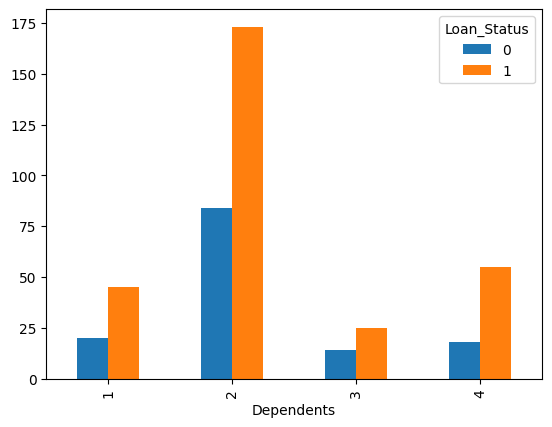

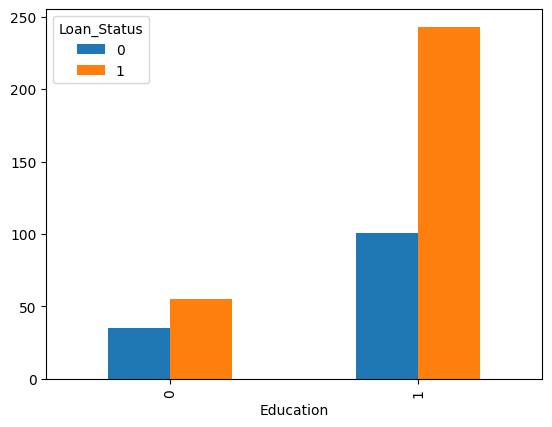

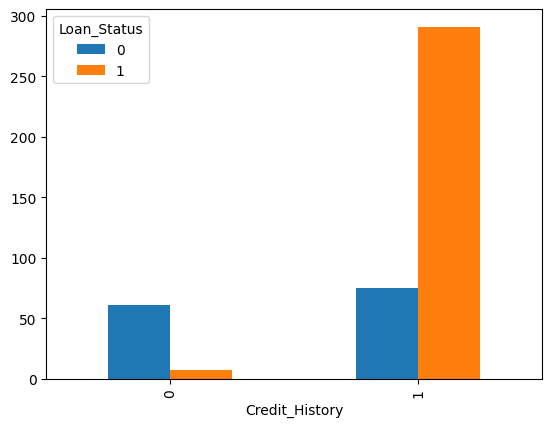

In [91]:
pd.crosstab(df['Dependents'], df.Loan_Status).plot(kind="bar")
pd.crosstab(df['Education'], df.Loan_Status).plot(kind="bar")
pd.crosstab(df['Credit_History'], df.Loan_Status).plot(kind="bar")
#pd.crosstab(df['Property_Area'], df.Loan_Status).plot(kind="bar")

In [92]:
df[df.Loan_Status == 1].shape

(298, 7)

In [93]:
df[df.Loan_Status == 0].shape

(136, 7)

<b> 4. Data Preparation

In [94]:
#Extracting Independent and dependent Variable  
X = df.drop(["Loan_Status"], axis=1)
y = df['Loan_Status']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

<b> 5. Create LOGISTIC Regression model

In [96]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  


LogisticRegression(random_state=0)

In [97]:
regression = LogisticRegression(C=1, penalty='l1', solver='liblinear')
regression.fit(X_train, y_train)
regression.score(X_test, y_test)

0.8473282442748091

In [98]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [99]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [100]:
cm

array([[21, 18],
       [ 2, 90]])

In [101]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

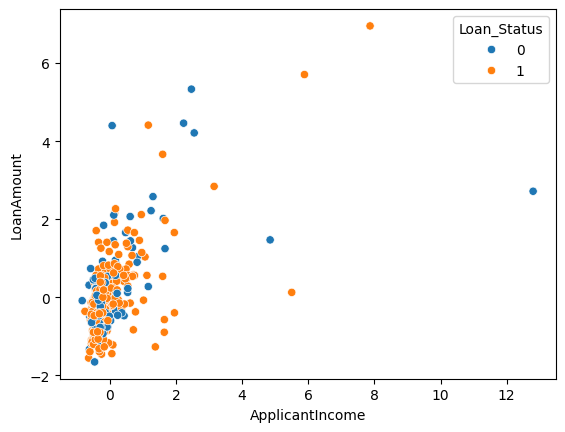

In [102]:
import seaborn as sns
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status',data=df)

In [103]:
#with open('logistic_loan.pkl', 'wb') as f:
    #pickle.dump(regression, f)

In [104]:
#scaler.transform([[4500,3000]])

In [105]:
#regression.predict([0,1,1,scaler.transform([[4500,3000]]),1,3])

In [106]:
df

,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,1,0.0,-0.089136,-0.172830,1,0
3,2,0,0.0,-0.426485,-0.272459,1,1
4,2,1,0.0,0.149876,-0.010933,1,1
6,2,0,0.0,-0.468654,-0.583799,1,1
7,3,1,0.0,-0.350075,0.200779,0,0
...,...,...,...,...,...,...,...
608,2,1,0.0,-0.317015,-0.421902,1,1
609,2,1,0.0,-0.373015,-0.882686,1,1
610,3,1,0.0,-0.169594,-1.268749,1,1
611,1,1,0.0,0.499370,1.383873,1,1


In [107]:
pickle.dump(regression, open('logisticloan.pkl','wb'))


In [108]:
pickled_model = pickle.load(open('logisticloan.pkl', 'rb'))
pickled_model.predict(X_test)


array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])